In [85]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#%matplotlib inline

In [86]:
data = pd.read_csv('Camera_Price_Prediction_dataset.csv')
data.head(5)

,Model,Release date,Max resolution,Effective pixels,Zoom tele (T),Macro focus range,Weight (inc. batteries),Price,Affordability
0,Agfa ePhoto 1280,1997,1024,0,114,40,420,179,1
1,Agfa ePhoto 1680,1998,1280,1,114,0,420,179,1
2,Agfa ePhoto CL18,2000,640,0,45,0,0,179,1
3,Agfa ePhoto CL30,1999,1152,0,35,0,0,269,1
4,Agfa ePhoto CL30 Clik!,1999,1152,0,43,0,300,1299,0


In [73]:
data.shape #It shows (Amount of rows , amount of columns.)

(491, 9)

In [74]:
data.describe() #statistical details of the dataset

,Release date,Max resolution,Effective pixels,Zoom tele (T),Macro focus range,Weight (inc. batteries),Price,Affordability
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,2003.187373,2408.851324,4.287169,114.291242,9.083503,334.684318,362.146640,0.934827
std,2.799694,805.576450,2.905487,87.853558,9.630264,295.961512,799.761869,0.247083
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000
25%,2001.000000,1932.000000,2.000000,70.000000,3.500000,190.000000,139.000000,1.000000
50%,2004.000000,2400.000000,4.000000,108.000000,9.000000,240.000000,179.000000,1.000000
75%,2005.000000,2848.000000,6.000000,116.000000,10.000000,332.500000,249.000000,1.000000
max,2007.000000,5616.000000,21.000000,486.000000,85.000000,1860.000000,7999.000000,1.000000


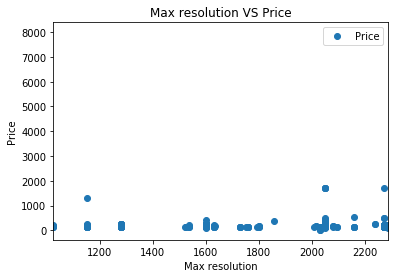

In [75]:
data.plot(x='Max resolution', y='Price', style='o')  
plt.title('Max resolution VS Price')  
plt.xlabel('Max resolution')  
plt.ylabel('Price')  
plt.show() #This will show if there is any relation between these two attribute



In [76]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Price'])  #This Will get the average range of price...

In [77]:
X = data['Max resolution'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
reg = LinearRegression() 
reg.fit(X_train, y_train) #Train the dataset for Release date with Price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
y_pred = reg.predict(X_test)

In [81]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,169,696.221808
1,249,336.743857
2,129,851.671733
3,179,268.734515
4,139,259.018895
5,199,123.000210
6,126,418.112177
7,126,419.326630
8,139,424.184440
9,129,293.023566


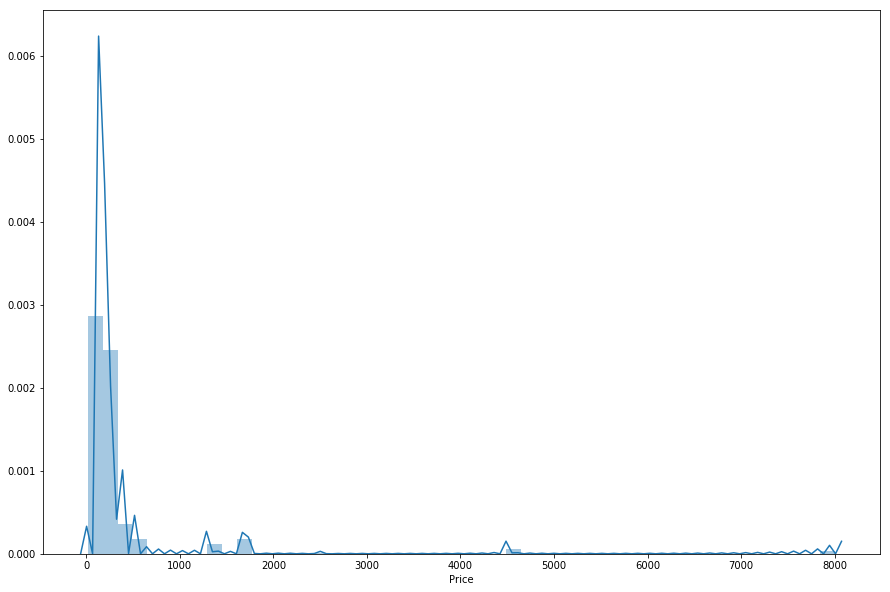

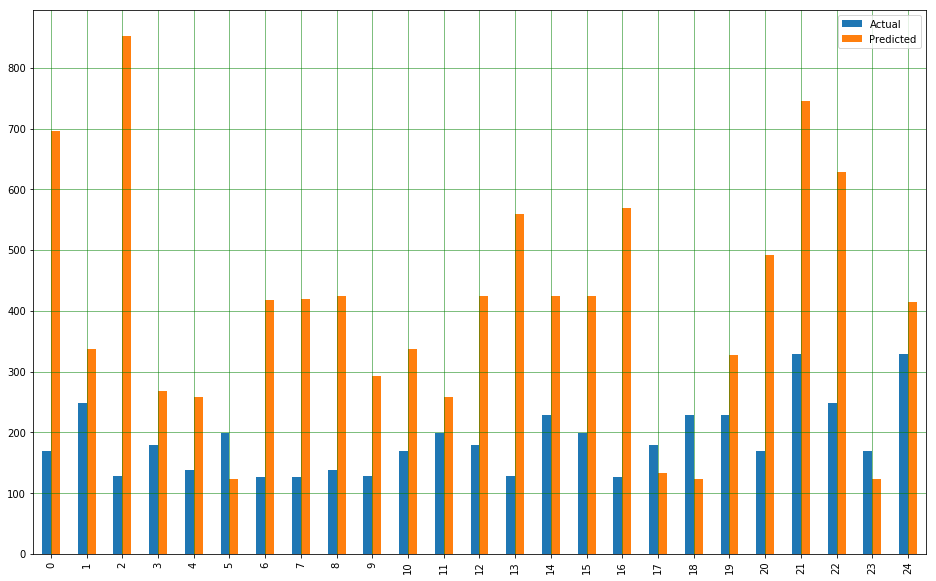

In [82]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

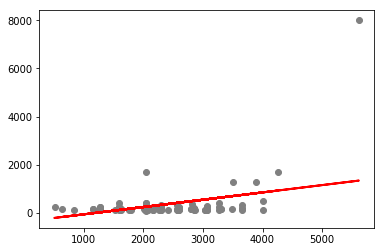

In [83]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [84]:
y_pred = reg.predict([[800]]) #For a random value input
y_pred

array([[-119.89029746]])